## Python notebook to visualize kelly criterion wagering


In [81]:
#import libaries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [82]:
#kelly criteria for percentage of bankroll
'''
b =  1 #b is the net odds received on the wager ("b to 1"); that is, you could win $b (on top of getting back your $1 wagered) for a $1 bet
p = .5 #probability of winning
f = (p*(b+1)-1)/b
'''

'\nb =  1 #b is the net odds received on the wager ("b to 1"); that is, you could win $b (on top of getting back your $1 wagered) for a $1 bet\np = .5 #probability of winning\nf = (p*(b+1)-1)/b\n'

In [83]:
#function for wagering 

def kelly_wager(p,odds):
    b = odds - 1
    f = (b*p - (1-p)) / b
    #print(f)
    return f

In [93]:
def outcome(p):
    roll = np.random.rand(1)
    if p > roll:
        return (1)
    else:
        return(-1)
    

In [94]:
def bet(wager, bankroll):
    return (wager * bankroll)


In [95]:
def main(bankroll, outcome, multiplier = 1):
    amount = kelly_wager(p, b)
    winnings = bet(amount, bankroll) * multiplier * outcome
    bankroll = bankroll + winnings
    #print (bankroll)
    return bankroll


In [158]:
#starting conditions

bankroll_kelly = 100
bankroll_half_kelly = 100
bankroll_twokelly = 100
legend = ['kelly', '1/2 kelly', '2x kelly']

k_bankroll_lst = []
hk_bankroll_lst = []
tk_bankroll_lst = []

p = float(input('enter probability : ' ))
b = float(input('enter net odds in decimal form : '))
iter = 1000
#p = .52
#b = 1

for i in range(0,iter):
    result = outcome(p)
    bankroll_kelly = main(bankroll_kelly, result)
    k_bankroll_lst.append(bankroll_kelly)

    bankroll_half_kelly = main(bankroll_half_kelly, result, multiplier= .5)
    hk_bankroll_lst.append(bankroll_half_kelly)


    bankroll_twokelly = main(bankroll_twokelly, result, multiplier= 2)
    tk_bankroll_lst.append(bankroll_twokelly)

enter probability : .55
enter net odds in decimal form : 2


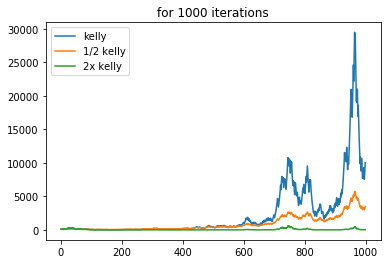

In [159]:
plt.plot(k_bankroll_lst)
plt.plot(hk_bankroll_lst)
plt.plot(tk_bankroll_lst)
plt.title(f'for {iter} iterations')
plt.legend(legend)

In [160]:
#k_bankroll_lst
## print Profit
print(f'Kelly Criteria profit = {bankroll_kelly-100}, lowest amount = {np.min(k_bankroll_lst)}, std dev = {np.std(k_bankroll_lst)}')
print(f'Half Kelly Profit = {bankroll_half_kelly-100}, lowest amount = {np.min(hk_bankroll_lst)}, std dev = {np.std(hk_bankroll_lst)}')
print(f'2x Kelly Profit = {bankroll_twokelly}, lowest amount = {np.min(tk_bankroll_lst)}, std dev = {np.std(tk_bankroll_lst)}')

Kelly Criteria profit = 9918.569915216069, lowest amount = 16.40834161199819, std dev = 4354.313707267849
Half Kelly Profit = 3389.83971659238, lowest amount = 49.62538393752237, std dev = 1126.397818323394
2x Kelly Profit = 38.72549292396013, lowest amount = 0.5026229882934785, std dev = 96.2165780435401


In [161]:
k_bankroll_lst[-1]/100

100.18569915216068